In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


mu = []
std = []

def plot_data(x, y):
  plt.scatter(x,y)

  plt.xlabel('Complaint Type')
  plt.ylabel('Time to Resolve (minutes)')
  plt.show()

def normalize(data):
  for i in range(0, data.shape[1]-1):
    mu.append(np.mean(data[:, i]))
    std.append(np.std(data[:, i]))
    data[:, i] = ((data[:, i] - np.mean(data[:,i]))/ np.std(data[:,i]))


def linearRegFun(x, w):
  return np.matmul(x, w)

def cost_function(x, y, w):
  return ((linearRegFun(x, w)- y).T@(linearRegFun(x, w)- y)/ 2*y.shape[0])

def gradient_descent(x, y, w, learning_rate = 0.1, num_epochs = 10):
  m = x.shape[0]

  J_all = []

  for i in range(num_epochs):
    h_x = linearRegFun(x, w)

    cost = (1/m)*(x.T@(h_x - y))

    w = w - (learning_rate)*cost

    J_all.append(cost_function(x, y, w))
  
  return w, J_all

def plot_cost(J_all, num_epochs):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(num_epochs, J_all, 'm', linewidth ='5')
  plt.show()



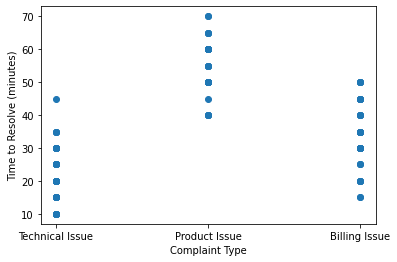

Parameters (w's):  [[27.83984583]
 [ 7.030889  ]
 [23.90328364]
 [-3.09432681]]


In [43]:
df = pd.read_csv('CustomerService.csv')

plot_data(df['Complaint_Type'], df['Time_to_Resolve'])

df.columns = ["Customer_ID","Complaint_type","Complaint_Details","Time_to_Resolve"]

X = df[['Complaint_type']] 
y = df['Time_to_Resolve'].values

categorical_features = ["Complaint_type"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
y = np.reshape(y, (124, 1))

features = np.hstack((np.ones((transformed_X.shape[0],1)),transformed_X))

w_s = np.zeros((features.shape[1],1))

learning_rate = 0.1

num_epochs =50

w_s, J_all = gradient_descent(features, y, w_s, learning_rate, num_epochs)

#J = cost_function(features, y, w_s)

#print("Cost: ", J)
print("Parameters (w's): ", w_s)

#test(w_s, [124, 1])

